In [14]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
df = pd.read_csv('../data/proposicoes_ord_2013-2023.csv')
colunas = df.columns.tolist()

In [38]:
colunas = [col for col in df.columns if col != 'VirouLei'] + ['VirouLei']
df = df.reindex(columns=colunas)
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor,Partido_Pres_Cam,VirouLei
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0.077973,1,0,0,PMDB,0
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0.024691,1,0,0,PMDB,0
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0.025341,1,0,0,PMDB,0
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0.148148,1,0,0,PMDB,0
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0.033138,1,0,0,PMDB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936,PL 5610/2023,2409046,PL,2023-12-04,2023,1,1,0,1,0,0.080078,0,1,0,PP,1
7937,PL 5867/2023,2409610,PSB,2023-12-05,2023,0,1,0,0,0,0.029297,1,0,0,PP,1
7938,PL 4266/2023,2410466,PSD,2023-12-06,2023,0,0,1,0,0,0.132812,1,0,0,PP,1
7939,PL 6009/2023,2413196,PT,2023-12-13,2023,1,0,0,0,0,0.007812,1,0,0,PP,0


In [36]:
'''with open('ementas.pkl'):
    pk = pd.read_pickle('ementas.pkl')
    df['Ementas_Vector'] = list(pk)
colunas = df.columns.tolist()
colunas.insert(-1, colunas.pop(colunas.index('Ementas_Vector')))
df = df[colunas]'''

In [30]:
contagem_por_ano = df.groupby(['Ano', 'VirouLei']).size().unstack()
contagem_por_ano['percentual'] = (contagem_por_ano[1] / (contagem_por_ano[0] + contagem_por_ano[1])) * 100
print(contagem_por_ano)

VirouLei     0    1  percentual
Ano                            
2013       866   58    6.277056
2014       514   48    8.540925
2015      1335  121    8.310440
2016       858   68    7.343413
2017       765   75    8.928571
2018       493   42    7.850467
2019       491  116   19.110379
2020      1044   88    7.773852
2021       514   70   11.986301
2022       121   34   21.935484
2023       183   37   16.818182


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7961 entries, 0 to 7960
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   nomeProposicao                          7961 non-null   object 
 1   idProposicao                            7961 non-null   int64  
 2   partidoAutor                            7961 non-null   object 
 3   DataApresentacao                        7961 non-null   object 
 4   Ano                                     7961 non-null   int64  
 5   Administração e Políticas Públicas      7961 non-null   int64  
 6   Desenvolvimento Social e Urbano         7961 non-null   int64  
 7   Direitos e Justiça                      7961 non-null   int64  
 8   Economia e Desenvolvimento Sustentável  7961 non-null   int64  
 9   Infraestrutura e Gestão de Recursos     7961 non-null   int64  
 10  VirouLei                                7961 non-null   int6

### Testando com Random Under Sampling 
(redução da classe de dados majoritária: Não virou lei)

In [25]:
X = df[colunas[5:-3] + [colunas[-3]] ]
y = df[colunas[-1]]


undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)
X_resampled


,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,PPC_igual_partidoAutor
2934,0,0,0,1,1,0.103314,0,0,0
1701,1,0,0,0,1,0.038986,0,0,0
7088,0,1,0,0,0,0.058480,1,0,0
257,0,1,0,0,0,0.171540,1,0,0
2883,0,0,0,1,0,0.066277,1,0,0
...,...,...,...,...,...,...,...,...,...
7934,1,1,0,1,0,0.132812,1,0,1
7935,0,1,1,0,0,0.115234,1,0,0
7936,1,1,0,1,0,0.080078,0,1,0
7937,0,1,0,0,0,0.029297,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))  # Camada de entrada e primeira camada oculta
model.add(Dense(5, activation='relu'))  # Segunda camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída (para classificação binária)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5396 - loss: 0.6844 - val_accuracy: 0.5908 - val_loss: 0.6805
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6069 - loss: 0.6707 - val_accuracy: 0.5875 - val_loss: 0.6756
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6146 - loss: 0.6711 - val_accuracy: 0.5842 - val_loss: 0.6747
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.6652 - val_accuracy: 0.5809 - val_loss: 0.6731
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 0.6707 - val_accuracy: 0.5809 - val_loss: 0.6729
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 0.6580 - val_accuracy: 0.5908 - val_loss: 0.6745
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 0.6701 - val_accuracy: 0.5908 - val_loss: 0.6741
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 0.6494 - val_accuracy: 0.

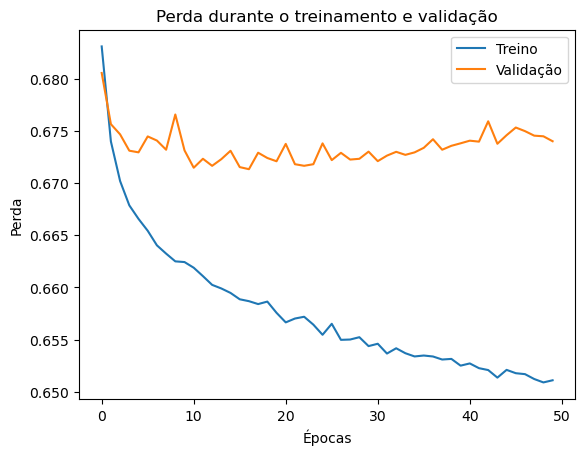

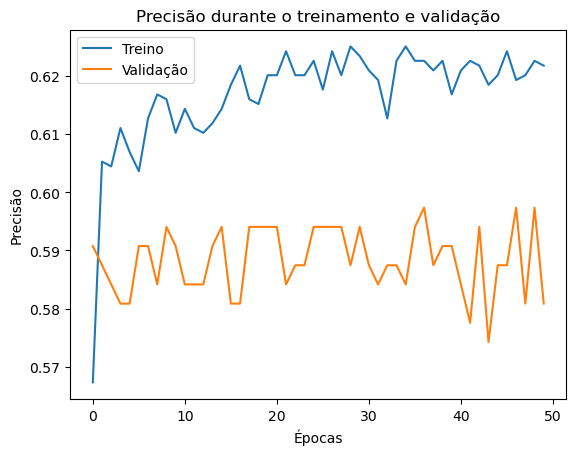

In [33]:
# Plotando as curvas de perda para identificar overfitting
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plotando as curvas de precisão para identificar overfitting
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Precisão durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


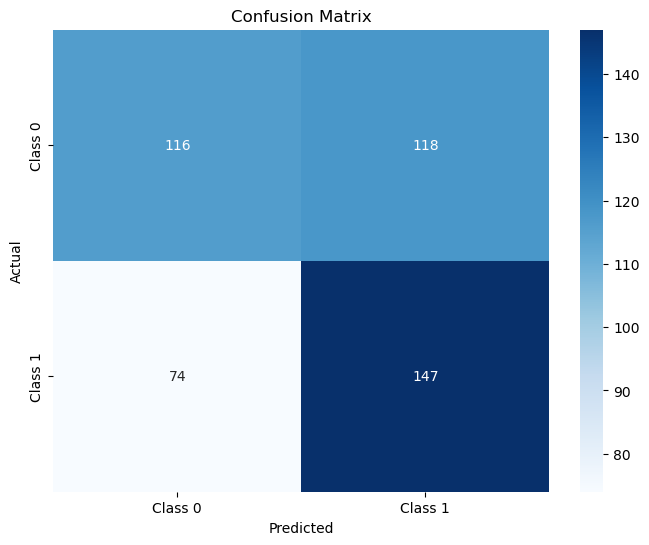

In [29]:
# Making predictions on the test set
import seaborn as sns


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test).round()
print(classification_report(y_test, y_pred))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       235
           1       0.68      0.73      0.71       226

    accuracy                           0.70       461
   macro avg       0.70      0.70      0.70       461
weighted avg       0.70      0.70      0.70       461



In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Criar um modelo
model = RandomForestClassifier()

# Realizar RFE
rfe = RFE(model, n_features_to_select=6)
X_rfe = rfe.fit_transform(X_resampled, y_resampled)

# Obter as features selecionadas
print("Features selecionadas:", X_resampled.columns[rfe.support_])



Features selecionadas: Index(['Administração e Políticas Públicas', 'Desenvolvimento Social e Urbano',
       'Economia e Desenvolvimento Sustentável', 'Influencia', 'Aliado',
       'PPC_igual_partidoAutor'],
      dtype='object')


PCA

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
X_pca = pca.fit_transform(list(pk))

In [61]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7956    1
7957    1
7958    1
7959    0
7960    1
Name: VirouLei, Length: 7961, dtype: int64

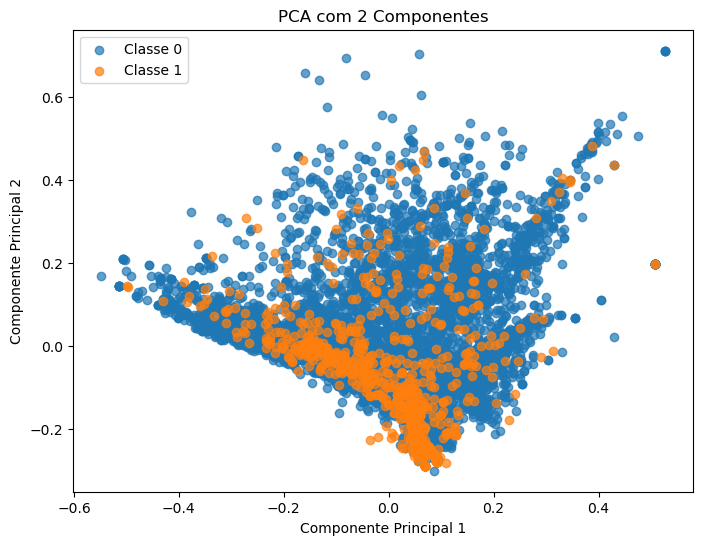

In [62]:
# Criar o gráfico
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Classe 0', alpha=0.7)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Classe 1', alpha=0.7)

# Personalizar o gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA com 2 Componentes')
plt.legend()
plt.show()


In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7956    1
7957    1
7958    1
7959    0
7960    1
Name: VirouLei, Length: 7961, dtype: int64

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seus dados estejam em um DataFrame pandas chamado `df`


correlation_matrix = X_resampled.corr()

# Plotar a matriz de correlação usando heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [55]:
import umap.umap_ as umap  # Importação correta
import matplotlib.pyplot as plt

# Redução de dimensionalidade usando UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
data_umap = umap_model.fit_transform(X)
labels = y

# Plotando os dados UMAP
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1], label='Classe')
plt.title('UMAP dos Dados')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()


ValueError: could not convert string to float: 'PMDB'

## Conclusão desse primeiro teste:

- Perda e Precisão constante em tese deveria ser bom, mas nesse caso ta bom demais pra ser verdade. (Teve casos q rodei q ficavam constantes).
- Tem casos q a perda cai rapidamente ou a precisão aumenta rapidamente. Também pode ser overfitting.
- Provavelmente ta com overfitting de toda forma
- Precisamos ver cross-validation e regularização, i guess
- Acho q tem fazer validação com o undersampling tbm. Fazer batches com diferentes amostras de undersampling
- Talvez testar com Oversampling também?
- Talvez precisaremos utilizar Stratified K-Folds 
- Talvez fazer Ajuste de Peso da Classe
- Depois testar com a porcentagem dos partidos também